# Phase 3 Project - Draft Outline

## 1. Project Setup
- Import necessary libraries (pandas, numpy, sklearn, matplotlib, seaborn)
- Load the dataset
- Set random seed for reproducibility

## 2. Data Exploration and Preprocessing
- Examine the dataset (head, info, describe) - done
- Check for missing values and handle them - done
- Explore data distributions and correlations - done ish
- Perform feature engineering if necessary
- Split the data into features (X) and target variable(s) (y)
- Split into training and testing sets - Pre done

## 3. Multiple Linear Regression
- Prepare the data (normalize/standardize if needed)
- Create and train the model
- Make predictions on the test set
- Evaluate the model (R-squared, MSE, RMSE)
- Analyze coefficients and their significance
- Visualize results

## 4. Logistic Regression
- Prepare the data (ensure binary target variable)
- Create and train the model
- Make predictions on the test set
- Evaluate the model (accuracy, precision, recall, F1-score)
- Plot the ROC curve and calculate AUC
- Analyze coefficients and their significance

## 5. Decision Trees
- Prepare the data
- Create and train the model
- Make predictions on the test set
- Evaluate the model (accuracy, precision, recall, F1-score)
- Visualize the tree structure
- Analyze feature importance

## 6. Model Comparison
- Compare performance metrics across all models
- Discuss strengths and weaknesses of each approach
- Recommend the best model(s) for the problem at hand

## 7. Conclusion and Future Work
- Summarize key findings
- Discuss limitations of the current approach
- Suggest potential improvements or additional models to try

## Student details
xxx


## Business Problem

# Can you predict which water pumps are faulty?

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.



## 1. Project Setup
- Import necessary libraries (pandas, numpy, sklearn, matplotlib, seaborn)
- Load the dataset

In [1]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load training dataset
sub_df = pd.read_csv('./SubmissionFormat.csv',index_col=0)
training_df = pd.read_csv('./TrainingSetValues.csv',index_col=0)
test_df = pd.read_csv('./TestSetValues.csv',index_col=0)
t_label_df = pd.read_csv('TrainingSetLabels.csv',index_col=0)




## 2. Data Exploration and Preprocessing
- Examine the dataset (head, info, describe)
- Check for missing values and handle them
- Explore data distributions and correlations
- Perform feature engineering if necessary
- Split the data into features (X) and target variable(s) (y)
- Split into training and testing sets

In [3]:
# Function to display dataset info
def display_dataset_info(df, name):
    print(f"\n=== {name} ===")
    print(f"Shape: {df.shape}")
    print("\nInfo:")
    print(df.info())
    print("\nDescription:")
    print(df.describe())
    print("\nHead:")
    print(df.head())
    print("\n" + "="*40)

# Display info for each dataset
display_dataset_info(sub_df, "Submission Format")
display_dataset_info(training_df, "Training Set Values")
display_dataset_info(test_df, "Test Set Values")
display_dataset_info(t_label_df, "Training Set Labels")


=== Submission Format ===
Shape: (14850, 1)

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 50785 to 68707
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_group  14850 non-null  object
dtypes: object(1)
memory usage: 232.0+ KB
None

Description:
           status_group
count             14850
unique                1
top     predicted label
freq              14850

Head:
          status_group
id                    
50785  predicted label
51630  predicted label
17168  predicted label
45559  predicted label
49871  predicted label


=== Training Set Values ===
Shape: (59400, 39)

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 no

In [4]:
#check for missing values in training dataset
training_df.isna().sum()



amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

Dropping columns and reasons why:
Scheme name - Too many null values 
wpt_name - Too many unique values
management - management group covers this
quality group - quality covers this
quantity group
extracton type group 

Numerical columns:
num private - dont know what this means. 

Observations
Funder and installer are similar, but funder has less null values than installer. 
Waterpoint type and water point are similar - Will drop waterpoint type. 



In [5]:
#Check categorical columns
training_df.select_dtypes(include=['object']).columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [7]:
#check numerical columns
training_df.select_dtypes(include=['int64', 'float64']).columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year'],
      dtype='object')

In [8]:
#Define the list of columns to drop
columns_drop = ['wpt_name','lga','ward','quality_group','extraction_type_class','management','source','waterpoint_type_group','num_private']

# Drop unnecessary columns
training_df = training_df.drop(columns_drop,axis=1)

#Print remaining columns
print(training_df.columns)

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'management_group',
       'payment', 'payment_type', 'water_quality', 'quantity',
       'quantity_group', 'source_type', 'source_class', 'waterpoint_type'],
      dtype='object')


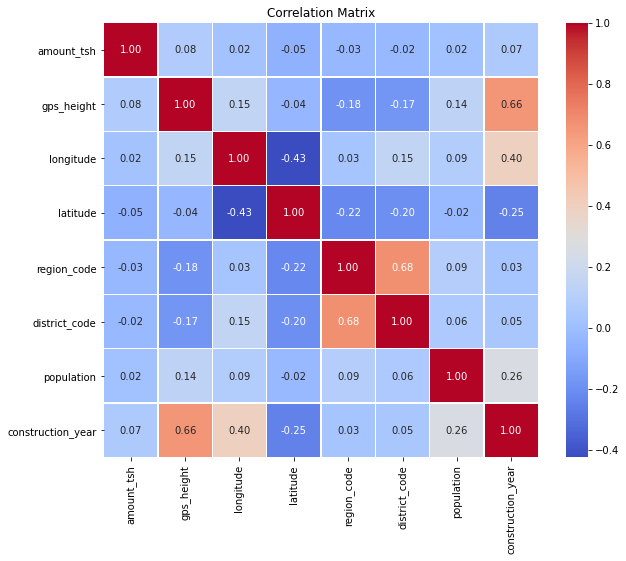

In [9]:
#explore data distrubitions and correlations of the numerical- training data
corr_matrix = training_df.corr()

# Plot the correlation matrix using Seaborn for numerical values.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# merge with training labels data using ID as connector
merged_df = pd.merge(training_df, t_label_df, on='id', how='outer', indicator=True)
print(merged_df.head(20))

       amount_tsh date_recorded                   funder  gps_height  \
id                                                                     
69572      6000.0    2011-03-14                    Roman        1390   
8776          0.0    2013-03-06                  Grumeti        1399   
34310        25.0    2013-02-25             Lottery Club         686   
67743         0.0    2013-01-28                   Unicef         263   
19728         0.0    2011-07-13              Action In A           0   
9944         20.0    2011-03-13      Mkinga Distric Coun           0   
19816         0.0    2012-10-01                     Dwsp           0   
54551         0.0    2012-10-09                    Rwssp           0   
53934         0.0    2012-11-03                 Wateraid           0   
46144         0.0    2011-08-03              Isingiro Ho           0   
49056         0.0    2011-02-20                  Private          62   
50409       200.0    2013-02-18                   Danida        

In [11]:
#check for missing values in merged dataset
merged_df.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quantity                     0
quantity_group               0
source_type                  0
source_class                 0
waterpoint_type              0
status_group                 0
_merge                       0
dtype: i

In [12]:
#Treat null values
missing_value_columns = ['funder', 'installer', 'subvillage', 'public_meeting','scheme_name', 'scheme_management', 'permit']

# Check the value counts
for col in missing_value_columns:
    print(merged_df[col].value_counts())

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Quick Win/halmashauri        1
Mnyambe                      1
Weepers                      1
Tanzania Compasion           1
Noshad                       1
Name: funder, Length: 1897, dtype: int64
DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
              ...  
COW               1
Kizenga           1
DWE & LWI         1
NDM               1
Tanza             1
Name: installer, Length: 2145, dtype: int64
Madukani     508
Shuleni      506
Majengo      502
Kati         373
Mtakuja      262
            ... 
Lusembo        1
Ndong'E A      1
Mnari          1
Mhagata        1
Nyabinoni      1
Name: subvillage, Length: 19287, dtype: int64
True     51011
False     5055
Name: public_meeting, dtype: int64
K                                   682
None            

In [16]:
# Remove rows with missing values in 'funder', 'installer' and 'scheme_management' columns
training_df.dropna(subset=['funder','installer', 'scheme_management'], axis=0, inplace=True)

Replacing the missing values for public meeting and permit with False. Assuming that the information doesnt exist. 

In [24]:
# Fill missing values in public meeting and permit'
for col in ['public_meeting', 'permit']:
    training_df[col] = training_df[col].fillna(False)

#Fill in missing values in 'scheme_name', subvillage
for col2 in ['scheme_name', 'subvillage']:
    training_df[col2] = training_df[col2].fillna('None')




In [25]:
# Confirm there are no more missing values
training_df.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
management_group         0
payment                  0
payment_type             0
water_quality            0
quantity                 0
quantity_group           0
source_type              0
source_class             0
waterpoint_type          0
dtype: int64

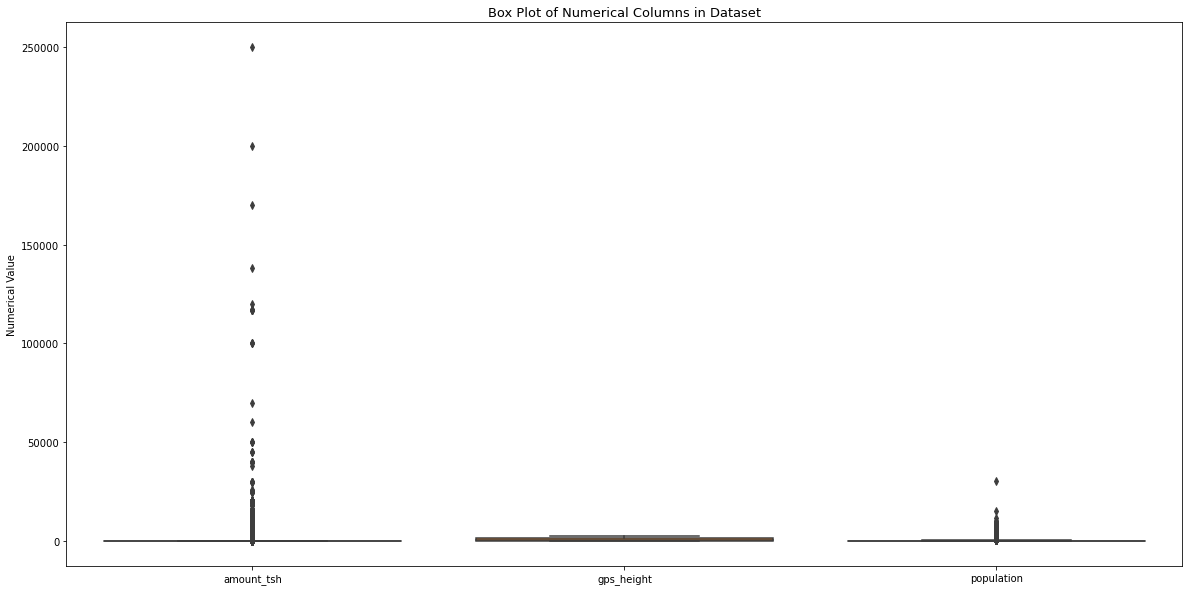

In [31]:
# Plotting box plots of some numerical columns
columns = ['amount_tsh', 'gps_height', 'population']
plt.figure(figsize=(20, 10))
sns.boxplot(data=[training_df[col] for col in columns])
plt.title("Box Plot of Numerical Columns in Dataset", fontsize=13)
plt.ylabel("Numerical Value")
plt.xticks(range(0,3), columns)
plt.show()

In [32]:
# Check whether there are duplicates
training_df.duplicated(keep = 'first').sum()


145

In [35]:
# Change the data type of public_meeting and permit columns to binary for classification
training_df[['public_meeting', 'permit']] = training_df[['public_meeting', 'permit']].astype(int)
# Check the new data types
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51880 entries, 69572 to 26348
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             51880 non-null  float64
 1   date_recorded          51880 non-null  object 
 2   funder                 51880 non-null  object 
 3   gps_height             51880 non-null  int64  
 4   installer              51880 non-null  object 
 5   longitude              51880 non-null  float64
 6   latitude               51880 non-null  float64
 7   basin                  51880 non-null  object 
 8   subvillage             51880 non-null  object 
 9   region                 51880 non-null  object 
 10  region_code            51880 non-null  int64  
 11  district_code          51880 non-null  int64  
 12  population             51880 non-null  int64  
 13  public_meeting         51880 non-null  int32  
 14  recorded_by            51880 non-null  object 
 15